<a href="https://colab.research.google.com/github/bcdmodelos/qualificacao-modelscode/blob/main/CodigosAnalises/code_dataset_cidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise da Base de dados COVID-19 Campina Grande

Cidade

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls

drive  sample_data


In [4]:
%cd /content/drive/MyDrive/Notebooks_Doutorado/base-campina/

!ls

/content/drive/MyDrive/Notebooks_Doutorado/base-campina
dataset_Amazonas_usableData.csv
dataset_Brasil_usableData.csv
dataset_CampinaGrande_casos_acumulados_usable.csv
dataset_CampinaGrande_usableData.csv
dataset_Paraiba_usableData.csv
dataset_Pernambuco_usableData.csv


In [5]:
file_path = "./dataset_CampinaGrande_casos_acumulados_usable.csv"
campinaGrande = pd.read_csv(file_path)
campinaGrande.head()

,Data,cum_casos
0,22/03/2020,25
1,23/03/2020,26
2,26/03/2020,27
3,27/03/2020,28
4,03/04/2020,29


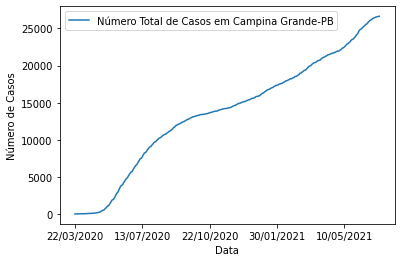

In [6]:
campinaGrande.plot(x="Data", y="cum_casos",ylabel="Número de Casos",label="Número Total de Casos em Campina Grande-PB")

In [13]:
file_path = "./dataset_CampinaGrande_casos_diarios_usable.csv"
campinaGrandeCasosDiarios = pd.read_csv(file_path)
campinaGrandeCasosDiarios.head()

,Data,casos_diarios
0,22/03/2020,1
1,23/03/2020,1
2,26/03/2020,1
3,27/03/2020,1
4,03/04/2020,1


In [14]:
campinaGrandeCasosDiarios['t'] = [i + 1 for i in range(campinaGrandeCasosDiarios.shape[0])]

campinaGrandeCasosDiarios['media_movel_3'] = campinaGrandeCasosDiarios['casos_diarios'].rolling(3).mean()
campinaGrandeCasosDiarios['media_movel_7'] = campinaGrandeCasosDiarios['casos_diarios'].rolling(7).mean()
campinaGrandeCasosDiarios['media_movel_15'] = campinaGrandeCasosDiarios['casos_diarios'].rolling(15).mean()

campinaGrandeCasosDiarios['media_movel_30'] = campinaGrandeCasosDiarios['casos_diarios'].rolling(30).mean()

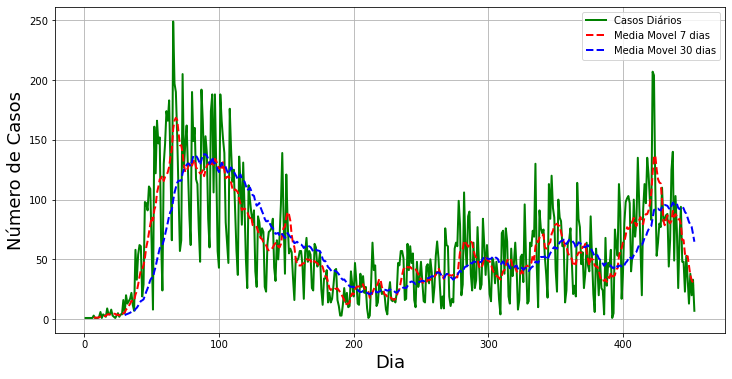

In [33]:
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(campinaGrandeCasosDiarios['t'], campinaGrandeCasosDiarios['casos_diarios'], label = 'Casos Diários', linewidth = 2, c="green")

ax.plot(campinaGrandeCasosDiarios['t'], campinaGrandeCasosDiarios['media_movel_7'], '--', label = 'Media Movel 7 dias', linewidth = 2, c="red")

ax.plot(campinaGrandeCasosDiarios['t'], campinaGrandeCasosDiarios['media_movel_30'], '--', label = 'Media Movel 30 dias', linewidth = 2, c="blue")

ax.set_xlabel('Dia', fontsize = 18)
ax.set_ylabel('Número de Casos', fontsize = 18)
ax.tick_params(axis='both', which='major')
ax.legend(fontsize = 10)
ax.grid(True)

plt.show()

Bairros